We looked at a lot of powerful tools for data mining. Today we are going to learn about one of my favorite tools for working on graph data: [NetworkX](https://networkx.org/).

Let's look at how we can install networkx---simply use pip to install networkx python package.

In [27]:
!pip install networkx[default]
# this will install all the necessary dependencies as well.

If you do not want to install the dependencies you can just use the following...

In [ ]:
!pip install networkx

If you want to upgrade the existing networkx package..

In [ ]:
!pip install --upgrade networkx

Now, let's do some simple operations like creating a graph and looking at some descriptive statistics.

Let us look at how we can create a simple undirected graph.

In [28]:
import numpy as np
import matplotlib.pyplot as plt

import networkx as nx

In [29]:
G = nx.Graph()

Now we have created an empty undirected graph. Let's look at some information about this graph.

In [30]:
print(f"Number of nodes is {G.number_of_nodes()}") 
print(f"Number of edges is {G.number_of_edges()}") 

Number of nodes is 0
Number of edges is 0


Let's try to add some edges...

In [31]:
G.add_edge('A','B')
G.add_edge('A','C')
G.add_edge('A','B')
G.add_edge('B','D')
G.add_edge('D','C')
G.add_edge('D','E')
G.add_edge('E','A')
# G.add_edges_from([('A','B'), ('A','C'), ('A','B'), ('B','D'), ('D','C'), ('D','E'), ('E','A')])  # add edges from iterable container
# you can use ints or strings or objects as node labels, usually it's better to stick with either ints or strings depending on the situation. 
# do not mix ints, str, obj as node labels, it might lead to unexpected errors

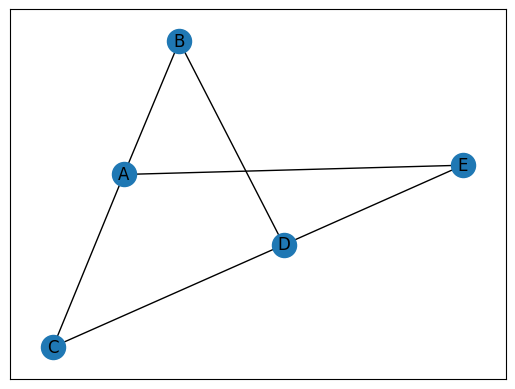

In [32]:
nx.draw_networkx(G)

Networkx's intended purpose is to analyze graphs not visualize them. They might remove this functionality from networkx and make it available as an add-on. Read more about it [here](https://networkx.org/documentation/stable/reference/drawing.html). In any case, for most general cases, in built drawing capabilities in networkx is sufficient. But if you want more powerful graph visualization you can use the following [PyGraphviz](https://pygraphviz.github.io/).

Also, you can add self loops to this undirected graph as well.

However, you cannot add parallel edges.

If you want to do this use **nx.MultiGraph()**

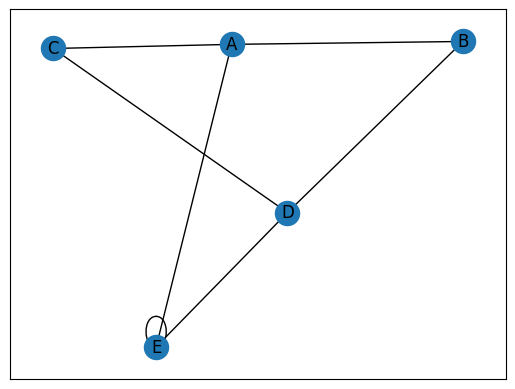

In [33]:
G.add_edge('E', 'E')
nx.draw_networkx(G)

In [34]:
G.remove_edge('E', 'E')  # This is how you remove an edge.

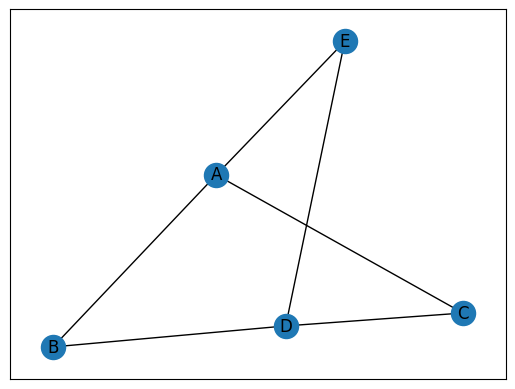

In [35]:
nx.draw_networkx(G)

Networkx used to have a method to display graph data, but they no longer have it in new verions..

In [36]:
nx.info(G)

AttributeError: module 'networkx' has no attribute 'info'

As we learnt in the last few weeks, we need adjacency matrix for our analysis.

In [37]:
A = nx.adjacency_matrix(G)
print(A)
print(type(A))

<Compressed Sparse Row sparse array of dtype 'int64'
	with 12 stored elements and shape (5, 5)>
  Coords	Values
  (0, 1)	1
  (0, 2)	1
  (0, 4)	1
  (1, 0)	1
  (1, 3)	1
  (2, 0)	1
  (2, 3)	1
  (3, 1)	1
  (3, 2)	1
  (3, 4)	1
  (4, 0)	1
  (4, 3)	1
<class 'scipy.sparse._csr.csr_array'>


**Compressed Sparse Row" (CSR) sparse array is a data structure used to represent a sparse matrix efficiently, where most of the elements are zero, by storing only the non-zero values along with their corresponding row and column indices.**

Note that we have a sparse matrix representation from scipy. Scipy is a great library that was a dependency of a few of the libraries that we have used so far. While we will not spend much time with scipy, it has lots of great functions for doing scientific computing with python.

A sparse matrix representation is very helpful for some applications and not helpful for others (but sparse is a reasonable default option). We can make the graph in to a dense matrix:

In [38]:
A.todense() # spits out a np array

array([[0, 1, 1, 0, 1],
       [1, 0, 0, 1, 0],
       [1, 0, 0, 1, 0],
       [0, 1, 1, 0, 1],
       [1, 0, 0, 1, 0]])

In [39]:
type(A.todense())

numpy.ndarray

Since the graph that we created is undirected, the adjacency matrix must be symmetric. We can check this as follows:

In [40]:
A.transpose().todense() == A.todense()

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

In [41]:
np.all(A.transpose().todense() == A.todense()) 
# The numpy.all() function tests whether all array elements along the mentioned axis evaluate to True.

np.True_

In [42]:
print(np.all(A.transpose().todense() == A.todense()))

True


Let' try to view the degree of a particular node.

In [ ]:
nx.degree(G, 'A')

If you want to look at the degrees of all nodes, you can simply call following method...

In [43]:
nx.degree(G)

DegreeView({'A': 3, 'B': 2, 'C': 2, 'D': 3, 'E': 2})

This function returns a DegreeView object. This [DegreeView](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.degree.html#networkx.Graph.degree) object is kind of like a dictionary but with more capabilities. 
This object provides an iterator for (node, degree) as well as lookup for the degree for a single node.

In [44]:
for node, degree in nx.degree(G):
    print(f"Node {node}'s degree is {degree}")

Node A's degree is 3
Node B's degree is 2
Node C's degree is 2
Node D's degree is 3
Node E's degree is 2


You can also convert this DegreeView into a dictionary, if that is what you prefer...

In [45]:
deg_view = nx.degree(G)
degree_dict = dict(deg_view) # degrees as a dictionary
print(degree_dict)
deg_vals = degree_dict.values() # list of available degrees
print(deg_vals)

{'A': 3, 'B': 2, 'C': 2, 'D': 3, 'E': 2}
dict_values([3, 2, 2, 3, 2])


If you need to create a histogram of available degrees, then you need a list of available degrees.
Hence, you can convert the DegreeView into a dictionary and then ask python to spit out the values of the dictionary.

Let's try to create a histogram of the degrees...

Text(0, 0.5, 'Number of nodes with degree')

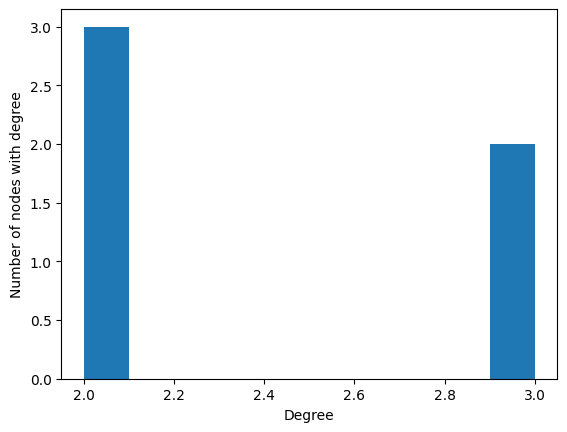

In [46]:
plt.hist(deg_vals)
plt.xlabel('Degree')
plt.ylabel('Number of nodes with degree')

In case you want to show only the int values in x-axis you can do something like follows:

dict_values([3, 2, 2, 3, 2])


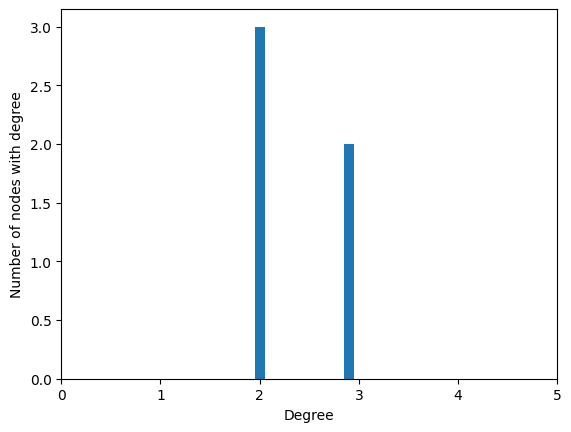

In [47]:
plt.hist(deg_vals, align='left')
plt.xlabel('Degree')
plt.ylabel('Number of nodes with degree')
plt.xticks(range(0, max(deg_vals)+3))
print(deg_vals)

Now let's try to look at the centrality measures that we learnt.

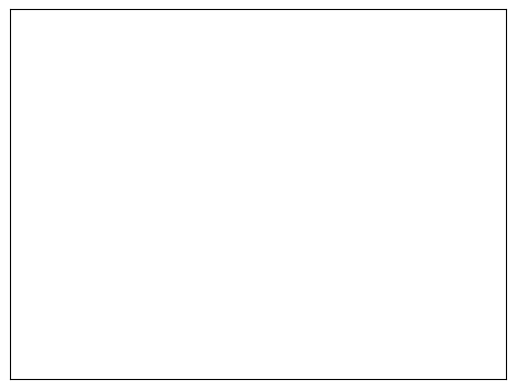

In [48]:
G.clear() # Remove all nodes and edges from the graph.
nx.draw_networkx(G)

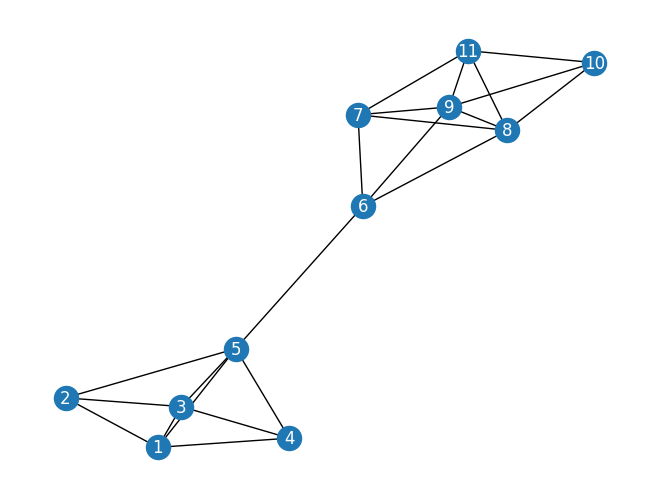

In [54]:
G = nx.Graph()
G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(1,4)
G.add_edge(1,5)
G.add_edge(2,3)
G.add_edge(2,5)
G.add_edge(3,4)
G.add_edge(3,5)
G.add_edge(4,5)
G.add_edge(5,6)
G.add_edge(6,7)
G.add_edge(6,8)
G.add_edge(6,9)
G.add_edge(7,8)
G.add_edge(7,9)
G.add_edge(7,11)
G.add_edge(8,9)
G.add_edge(8,10)
G.add_edge(8,11)
G.add_edge(9,10)
G.add_edge(9,11)
G.add_edge(10,11)

nx.draw(G, with_labels=True, font_color="white")

Text(0, 0.5, 'Number of nodes with the Degrees')

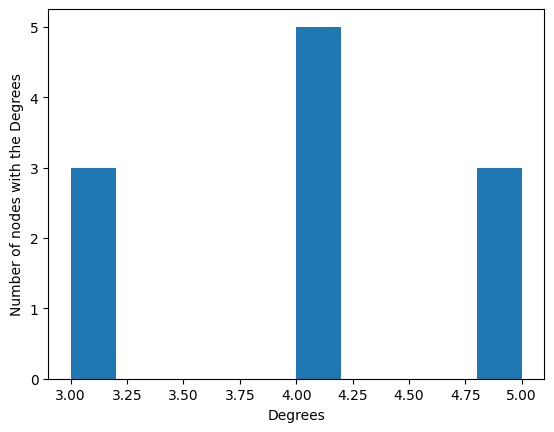

In [55]:
# First let us look at the degrees

plt.hist(dict(G.degree).values())
plt.xlabel('Degrees')
plt.ylabel('Number of nodes with the Degrees')

Let's look at the clusetering coefficient of the graph.

In [56]:
nx.clustering(G)

{1: 0.8333333333333334,
 2: 1.0,
 3: 0.8333333333333334,
 4: 1.0,
 5: 0.5,
 6: 0.5,
 7: 0.8333333333333334,
 8: 0.7,
 9: 0.7,
 11: 0.8333333333333334,
 10: 1.0}

We can use the clusetering coefficient as a global attribute as well.
Take the sum of the clustering coefficients and then divide by the number of nodes.

In [57]:
global_clustering_coeff = sum(nx.clustering(G).values())/G.number_of_nodes()
global_clustering_coeff

0.7939393939393941

Let's add edge G.add_edge(11,12) and see what happens.. Remember when you have a node with degree less than 2, cluserting coefficient of that node is 0.

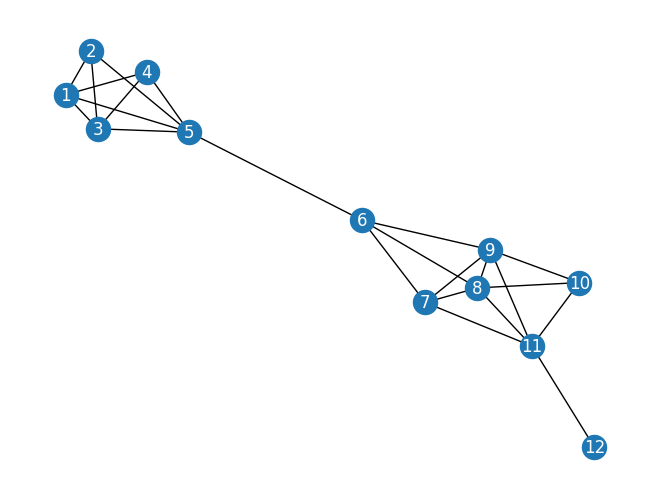

In [58]:
G.add_edge(11,12)
nx.draw(G, with_labels=True, font_color="white")

In [59]:
global_clustering_coeff = sum(nx.clustering(G).values())/G.number_of_nodes()
global_clustering_coeff

0.7000000000000001

Global clustering coefficient decreased slightly.....

Networkx contains some basic graph algorithms as well.

Let's say I want to find the shortest path from the node 1 to 12...

In [60]:
nx.shortest_path(G, 1, 12)

[1, 5, 6, 7, 11, 12]

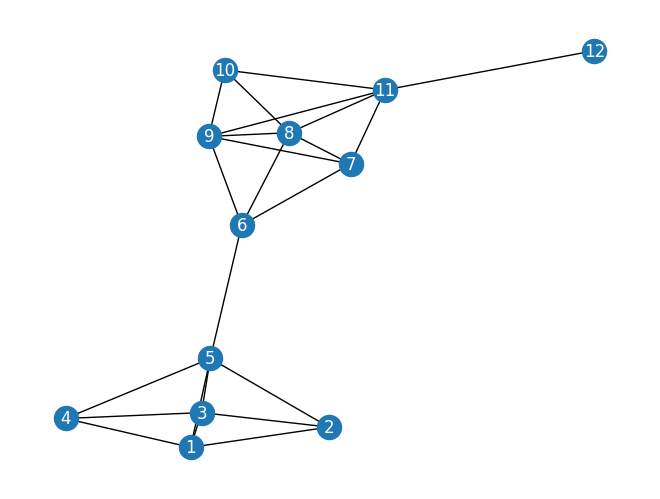

In [61]:
nx.draw(G, with_labels=True, font_color="white")

In [62]:
nx.shortest_path_length(G, 3, 12)

5

We can also compute all the centrality measures that we discussed in the class well.

In [63]:
nx.betweenness_centrality(G)

{1: 0.00606060606060606,
 2: 0.0,
 3: 0.00606060606060606,
 4: 0.0,
 5: 0.5151515151515151,
 6: 0.5454545454545454,
 7: 0.07272727272727272,
 8: 0.13333333333333333,
 9: 0.13333333333333333,
 11: 0.18787878787878784,
 10: 0.0,
 12: 0.0}

**[Betweeness centrality docs](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.betweenness_centrality.html)**

In [64]:
nx.betweenness_centrality(G, normalized=False) # using the definitions from the slides

{1: 0.3333333333333333,
 2: 0.0,
 3: 0.3333333333333333,
 4: 0.0,
 5: 28.333333333333332,
 6: 30.0,
 7: 4.0,
 8: 7.333333333333333,
 9: 7.333333333333333,
 11: 10.333333333333332,
 10: 0.0,
 12: 0.0}

In [65]:
# prestige centrality
nx.eigenvector_centrality(G)

{1: 0.12111066476709603,
 2: 0.10165165977166449,
 3: 0.12111066476709603,
 4: 0.10165165977166449,
 5: 0.18714468885372082,
 6: 0.34495908282586796,
 7: 0.38465042832450475,
 8: 0.44264909380060186,
 9: 0.44264909380060186,
 11: 0.39449303196740604,
 10: 0.30298319981081956,
 12: 0.09339393110263088}

If you want to control how many iterations, you can use the max_iter argument. But you will get an error if it fails to converge within that number of iterations. For example:

In [66]:
try:
    nx.eigenvector_centrality(G, max_iter=10)
except nx.PowerIterationFailedConvergence as e:
    print(e)

(PowerIterationFailedConvergence(...), 'power iteration failed to converge within 10 iterations')


Obviously, you can change the tolerance value and make it converge. The default tolerance value is 1.0e-6. You can change this value by passing tol=__

In [69]:
try:
    nx.eigenvector_centrality(G, max_iter=83)    # after 83 iterations eigenvector converges to the under the given tolerance.
except nx.PowerIterationFailedConvergence as e:
    print(e)

Just like this we can calculate the pagerank as well.

In [70]:
nx.pagerank(G)

{1: 0.08730340319971028,
 2: 0.06756715677255076,
 3: 0.08730340319971028,
 4: 0.06756715677255076,
 5: 0.10566432800254057,
 6: 0.08363158334363416,
 7: 0.08441531258951437,
 8: 0.10362010751800597,
 9: 0.10362010751800597,
 11: 0.11125101530800977,
 10: 0.06664351629466599,
 12: 0.03141290948110098}

Let's look at how we can read and write graphs to a file. 

The simplest form for a graph is the edge list, which contains one line for each edge in the graph.

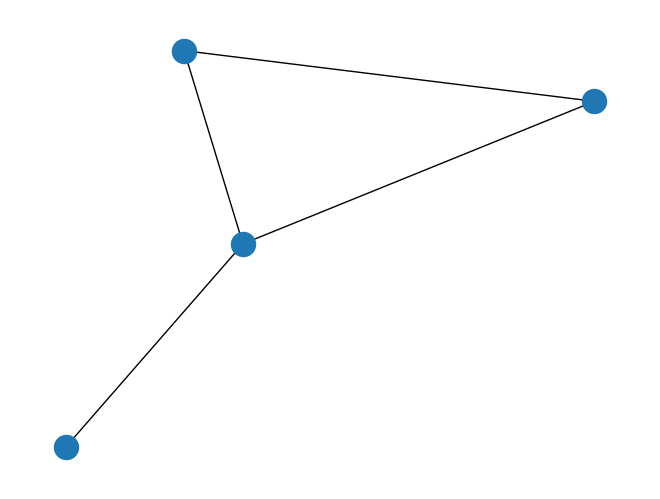

In [71]:
G = nx.Graph()
G.add_edge(1,2)
G.add_edge(2,3)
G.add_edge(3,1)
G.add_edge(3,4)
nx.draw(G)

Basically, you can create a text file that contains these edge list and directly load it through networkx.

In [72]:
f = open('sample_edge_list.txt', 'w')
f.write('1,2\n')
f.write('2,3\n')
f.write('3,1\n')
f.write('3,4\n')
f.close()

I am going to read these edges from sample_edge_list.txt file and directly load it to a networkx graph.

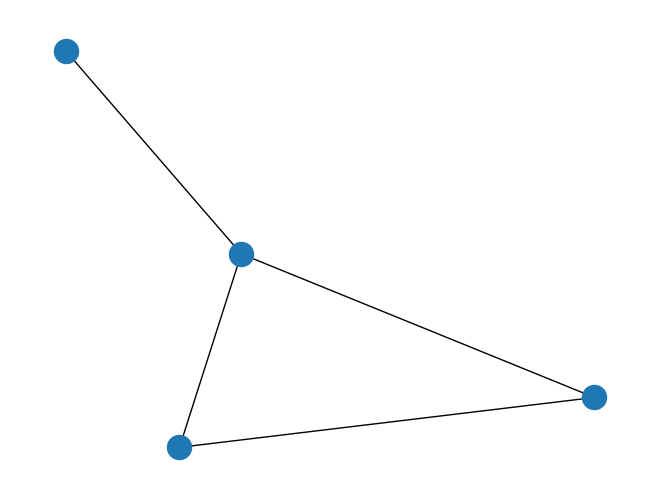

In [74]:
graph_from_file = nx.read_edgelist('sample_edge_list.txt', nodetype=int, delimiter=' ')
nx.draw(graph_from_file)

Let's look at few types of graphs we can create using networkx.

**Complete graph**

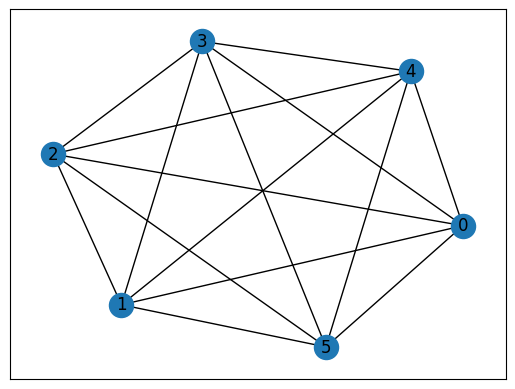

In [75]:
complete = nx.complete_graph(6) # complete graph with 6 vertices.
nx.draw_networkx(complete)

**Path graphs**

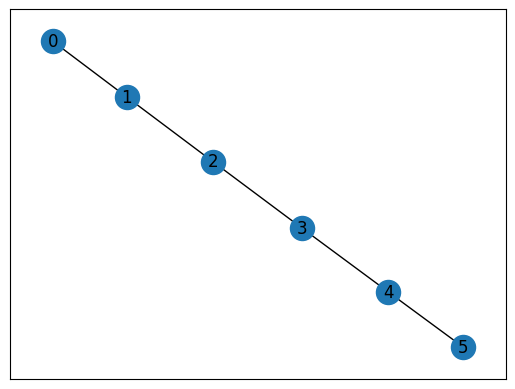

In [76]:
path = nx.path_graph(6)
nx.draw_networkx(path)

**Cycle graphs**

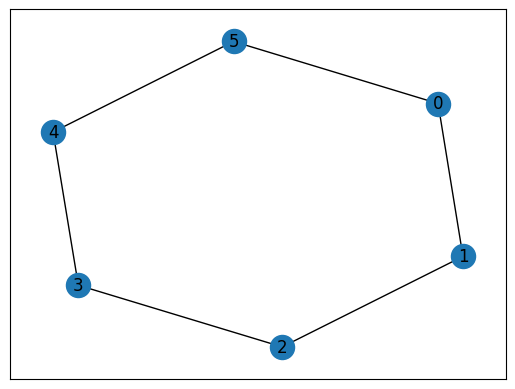

In [77]:
G_cycle = nx.cycle_graph(6)
nx.draw_networkx(G_cycle)

**Random Graph with n nodes and m edges**

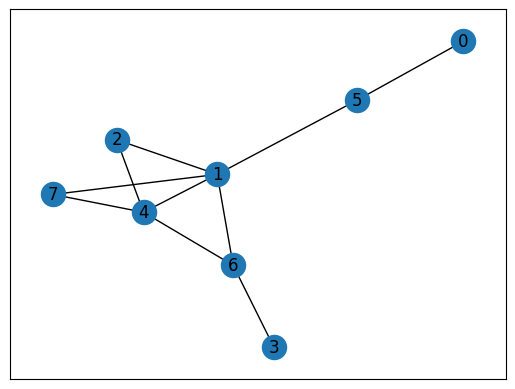

In [84]:
g_random_n_m = nx.gnm_random_graph(8, 10)
nx.draw_networkx(g_random_n_m)

**Random Graph with a Fixed Probability of Edge Creation**

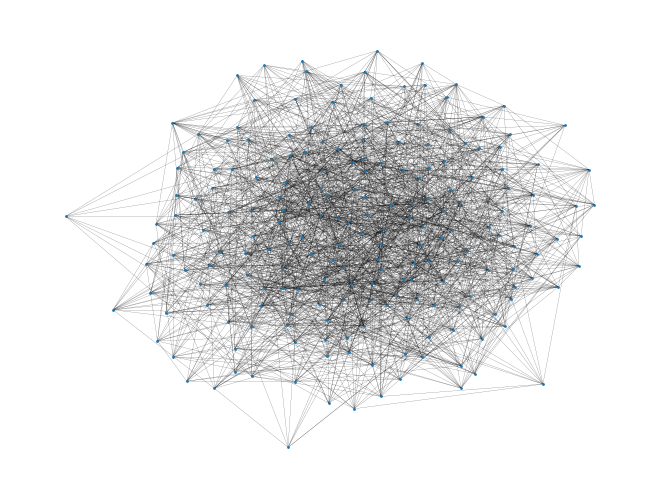

In [15]:
graph_random_n_m_eq_prob_edge = nx.erdos_renyi_graph(200, 0.1)
nx.draw(graph_random_n_m_eq_prob_edge, node_size =1, width=0.1)

In [ ]:
graph_random_n_m_eq_prob_edge = nx.erdos_renyi_graph(6, 0.5)
nx.draw_networkx(graph_random_n_m_eq_prob_edge)

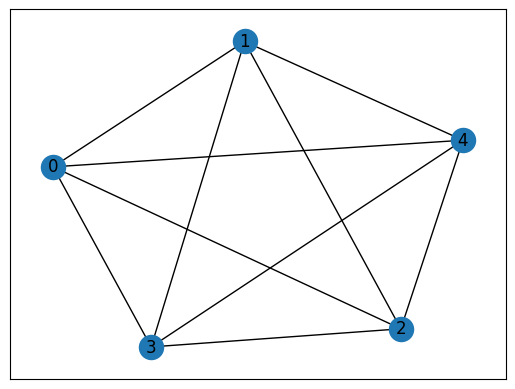

In [86]:
graph_random_n_m_eq_prob_edge = nx.erdos_renyi_graph(5, 1)
nx.draw_networkx(graph_random_n_m_eq_prob_edge)

**Random Graph with a Fixed Degree Sequence**

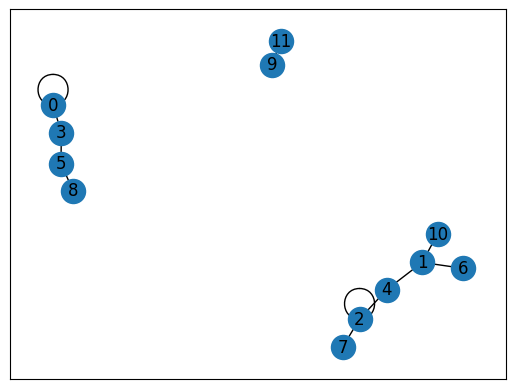

In [87]:
# Creates a random graph where the nodes' degree sequence is specified.
degree_sequence = [3, 3, 4, 2, 2, 2, 1, 1, 1, 1, 1, 1]
graph_with_given_degree_seq = nx.configuration_model(degree_sequence)
nx.draw_networkx(graph_with_given_degree_seq)

**Barabasi-Albert graph model**
Basically, if you want to create a random graph that follows small-world property and scale-free property, then you can use **Barabasi-Albert graph model**.

500


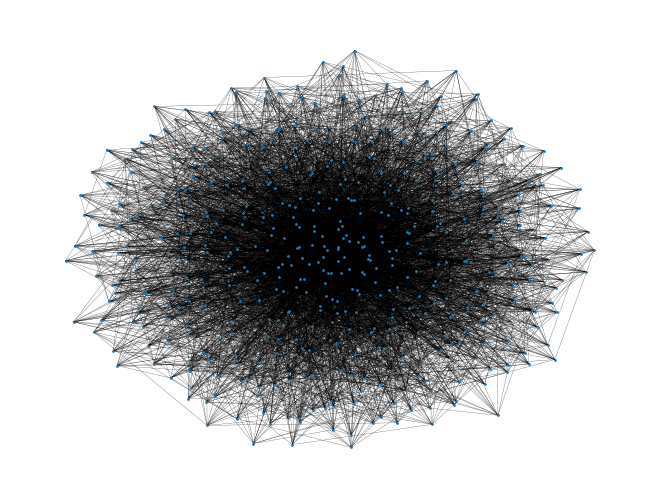

In [90]:
ba = nx.barabasi_albert_graph(n=500, m=15)  # n=nodes and m=number of edges to attach from a new node to existing nodes
print(ba.number_of_nodes())
nx.draw(ba, node_size=1, width=0.15) # when you use draw() Draw the graph as a simple representation with no node labels or edge labels and using the full Matplotlib figure area and no axis labels by default. 
# Scale-free: The degree distribution follows a power law, meaning a few nodes have many connections (hubs), and most nodes have few connections.
# often shows small-world property: most nodes are not neighbors of one another, but most nodes can be reached from every other node by a small number of hops or steps.

**Watts-Strogatz Small-World Graph model**

Creates a small-world graph with n nodes, where each node is connected to k nearest neighbors in a ring topology, and each edge has a probability p of being rewired.

This is not a scale-free graph.

200


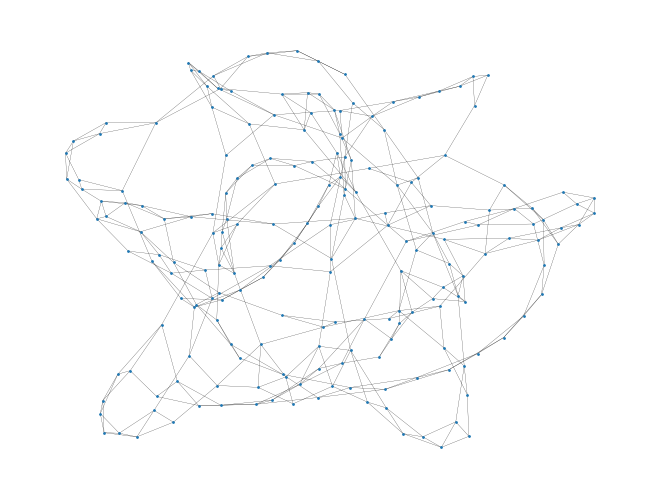

In [19]:
ws = nx.watts_strogatz_graph(200, 4, 0.1)
print(ws.number_of_nodes())
nx.draw(ws, node_size=1, width=0.15)
# print(max([p for p in nx.shortest_path_length(ws)]))
# print(nx.average_shortest_path_length(ws))

Sometimes, we want to get a sample of a large graph, so that it is easy to work with.

Let's create a large(ish) grapg and take a sample subgraph out of it.

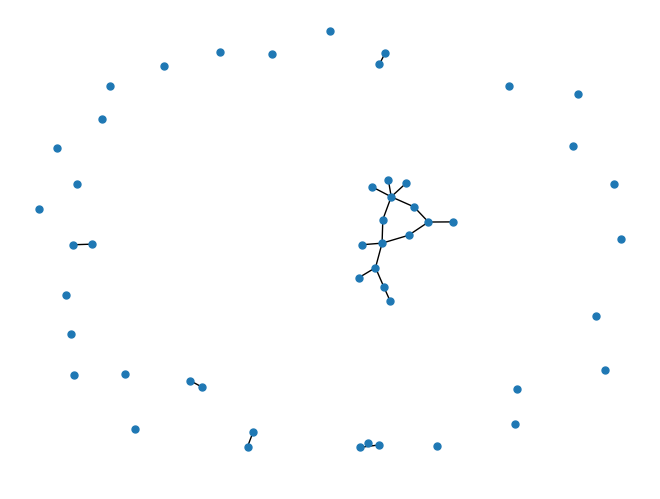

In [98]:
import random
ba = nx.barabasi_albert_graph(n=1000, m =10)
random_sample_of_nodes = random.sample(list(ba.nodes), 50)
ba50 = ba.subgraph(random_sample_of_nodes)
nx.draw(ba50,  node_size=25, width=1)

Most liklely, we will end up with a few connected components. We may want to take the largest connected component.

Then we can do the following:

In [99]:
max(nx.connected_components(ba50), key=len)

{9, 13, 17, 40, 63, 186, 193, 285, 307, 388, 401, 432, 502, 654, 936}

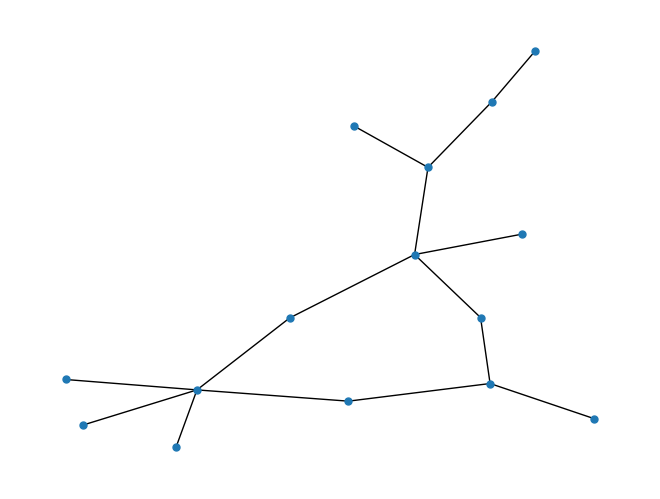

In [100]:
largest_component = max(nx.connected_components(ba50), key=len)
max_sub_induced = ba.subgraph(largest_component)
nx.draw(max_sub_induced,  node_size=25, width=1)